# Basic uses of SOMPY library
http://www.vahidmoosavi.com


https://github.com/sevamoo/sompy


In [1]:
import matplotlib.pylab as plt
%matplotlib inline
# import sompy as sompy
import pandas as pd
import numpy as np
from time import time
import sompy

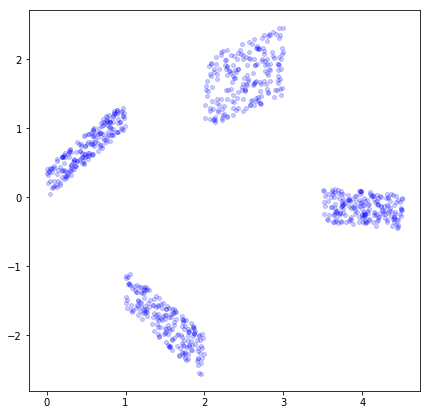

In [2]:
### A toy example: two dimensional data, four clusters

dlen = 200
def toy_example_data(params):
    a,b,c = params
    tmp = np.random.rand(dlen,1) + a
    return np.hstack((tmp, b*tmp + c*np.random.rand(dlen,1)))

Data1 = np.concatenate(list(map(toy_example_data, [(0,1,0.42), (1,-1,-.62), (2,0.5,1), (3.5,-0.1,0.5)])))

fig = plt.figure()
plt.plot(Data1[:,0],Data1[:,1],'ob',alpha=0.2, markersize=4)
fig.set_size_inches(7,7)

In [3]:

mapsize = [20,20]
som = sompy.SOMFactory.build(Data1, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything


 Training...
/usr/local/lib/python3.5/dist-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)
 pca_linear_initialization took: 0.180000 seconds
 Rough training...
 radius_ini: 3.000000 , radius_final: 1.000000, trainlen: 15

 epoch: 1 ---> elapsed time:  0.118000, quantization error: 0.229450

 epoch: 2 ---> elapsed time:  0.134000, quantization error: 0.106955

 epoch: 3 ---> elapsed time:  0.127000, quantization error: 0.071706

 epoch: 4 ---> elapsed time:  0.126000, quantization error: 0.068976

 epoch: 5 ---> elapsed time:  0.123000, quantization error: 0.062561

 epoch: 6 ---> elapsed time:  0.134000, quantization error: 0.058423

 epoch: 7 ---> elapsed time:  0.129000, quantization error: 

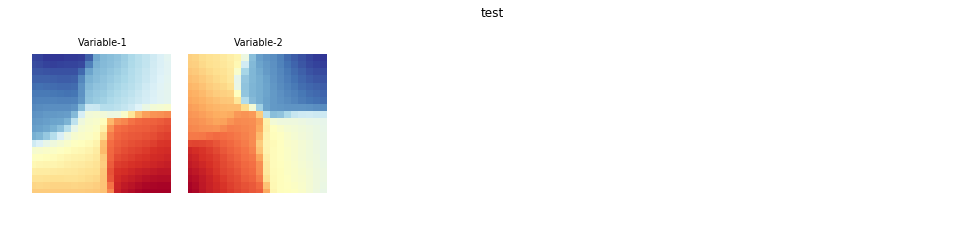

In [4]:
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
v.show(som, what='codebook', which_dim=[0,1], col_sz=6) #which_dim='all' default
# v.save('2d_packed_test')

# som.component_names = ['1','2']
# v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
# v.show(som, what='codebook', which_dim='all', cmap='jet', col_sz=6) #which_dim='all' default

# sompy.mapview.View2DPacked(50, 50, 'test', text_size=8).show(som, what='codebook', which_dim=[0,1], col_sz=6)


In [5]:
# c = sompy.mapview.View2DPacked()
v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
#first you can do clustering. Currently only K-means on top of the trained som
cl = som.cluster(n_clusters=4)
# print cl
getattr(som, 'cluster_labels')

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 3,
       3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3,

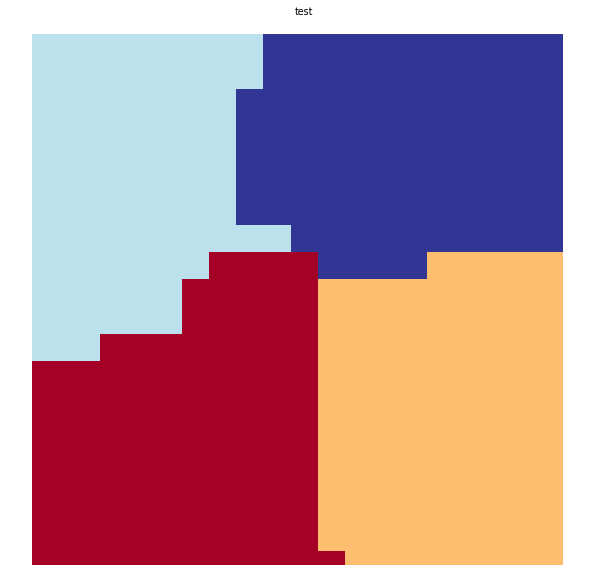

In [6]:
v.show(som, what='cluster')

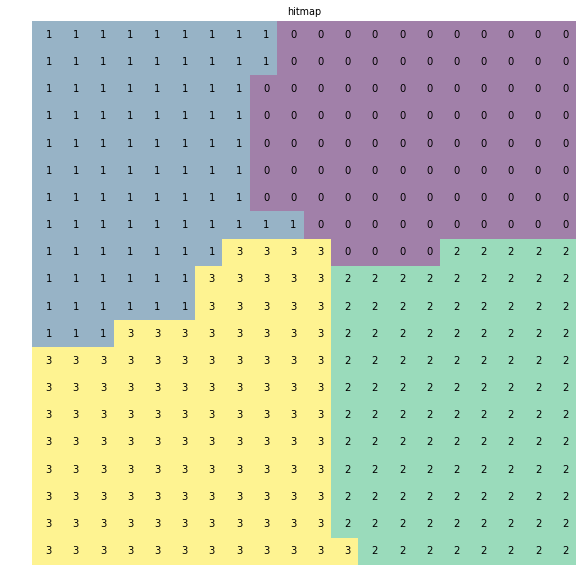

array([[  0,   0,   0],
       [  0,   1,   1],
       [  0,   2,   2],
       ..., 
       [ 19,  17, 397],
       [ 19,  18, 398],
       [ 19,  19, 399]])

In [7]:
h = sompy.hitmap.HitMapView(10, 10, 'hitmap', text_size=8, show_text=True)
h.show(som)

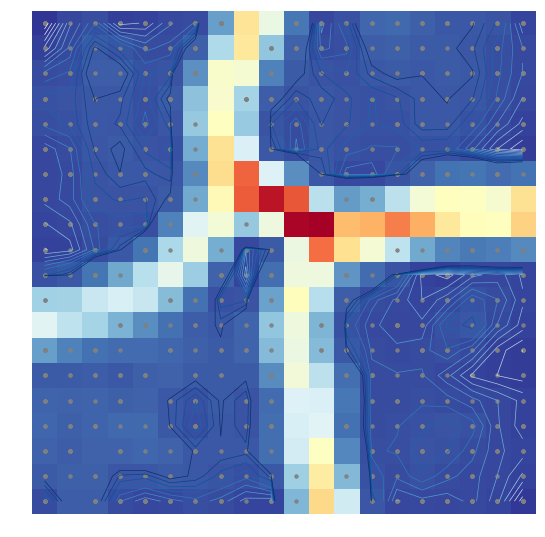

In [8]:
u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

#Here you have Umatrix plus its render
UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=True, blob=False)


In [ ]:
dlen = 700
tetha = np.random.uniform(low=0,high=2*np.pi,size=dlen)[:,np.newaxis]
X1 = 3*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y1 = 3*np.sin(tetha)+ .22*np.random.rand(dlen,1)
Data1 = np.concatenate((X1,Y1),axis=1)

X2 = 1*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y2 = 1*np.sin(tetha)+ .22*np.random.rand(dlen,1)
Data2 = np.concatenate((X2,Y2),axis=1)

X3 = 5*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y3 = 5*np.sin(tetha)+ .22*np.random.rand(dlen,1)
Data3 = np.concatenate((X3,Y3),axis=1)

X4 = 8*np.cos(tetha)+ .22*np.random.rand(dlen,1)
Y4 = 8*np.sin(tetha)+ .22*np.random.rand(dlen,1)
Data4 = np.concatenate((X4,Y4),axis=1)



Data2 = np.concatenate((Data1,Data2,Data3,Data4),axis=0)

fig = plt.figure()
plt.plot(Data2[:,0],Data2[:,1],'ob',alpha=0.2, markersize=4)
fig.set_size_inches(7,7)
# plt.plot(np.cos(tetha))

In [ ]:

mapsize = [30,30]
som = sompy.SOMFactory.build(Data2, mapsize, mask=None, mapshape='planar', lattice='rect', normalization='var', initialization='pca', neighborhood='gaussian', training='batch', name='sompy')  # this will use the default parameters, but i can change the initialization and neighborhood methods
som.train(n_job=1, verbose='info')  # verbose='debug' will print more, and verbose=None wont print anything


In [ ]:
v = sompy.mapview.View2DPacked(50, 50, 'test',text_size=8)  
# could be done in a one-liner: sompy.mapview.View2DPacked(300, 300, 'test').show(som)
v.show(som, what='codebook', which_dim=[0,1], cmap=None, col_sz=6) #which_dim='all' default
# v.save('2d_packed_test')

In [ ]:
#In this case, K-means simply fails as expected

v = sompy.mapview.View2DPacked(2, 2, 'test',text_size=8)  
#first you can do clustering. Currently only K-means on top of the trained som
cl = som.cluster(n_clusters=4)
v.show(som, what='cluster')
# v.save('kmeans_test')

In [ ]:
#But Umatrix finds the clusters easily

u = sompy.umatrix.UMatrixView(50, 50, 'umatrix', show_axis=True, text_size=8, show_text=True)

#This is the Umat value
UMAT  = u.build_u_matrix(som, distance=1, row_normalized=False)

UMAT = u.show(som, distance2=1, row_normalized=False, show_data=True, contooor=False, blob=False)
